<img src="https://www.shutterstock.com/shutterstock/photos/2443621059/display_1500/stock-photo-customer-churn-is-shown-using-a-text-2443621059.jpg" width="3000"/>

## Libraries

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,RobustScaler,PowerTransformer,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,classification_report,roc_curve, roc_auc_score
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,VotingClassifier,StackingClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2,f_classif
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [2]:

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (4).csv


# Columns  

1 - customerID: customerID.  
2 - gender: Whether the customer is a male or a female.  
3 - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0).  
4 - Partner: Whether the customer has a partner or not (Yes, No).  
5 - Dependents: Whether the customer has dependents or not (Yes, No).  
6 - tenure: Number of months the customer has stayed with the company.  
7 - PhoneService: Whether the customer has a phone service or not (Yes, No).  
8 - MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service).  
9 - InternetService: Customer's internet service provider (DSL, Fiber optic, No).  
10 - OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service).  
11 - OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service).  
12 - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service).  
13 - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service).  
14 - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service).  
15 - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service).  
16 - Contract: The contract term of the customer (Month-to-month, One year, Two year).  
17 - PaperlessBilling: Whether the customer has paperless billing or not (Yes, No).  
18 - PaymentMethod: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card).  
19 - MonthlyCharges: The amount charged to the customer monthly.  
20 - TotalCharges: The total amount charged to the customer.  
21 - Churn: Whether the customer churned or not (Yes or No).  

## EDA

In [3]:
df.shape

(7043, 21)

In [4]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
df.sample(10).T

,3537,5083,5552,6834,6556,6217,3437,1576,4505,1221
customerID,5062-CJJKH,7136-IHZJA,6072-NUQCB,3635-JBPSG,0661-KQHNK,1599-MMYRQ,2746-DIJLO,0993-OSGPT,6917-FIJHC,3055-MJDSB
gender,Male,Female,Male,Female,Female,Male,Female,Female,Female,Male
SeniorCitizen,0,0,0,0,0,0,0,1,0,0
Partner,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,Yes,Yes,No,No,No,No
tenure,25,40,22,15,6,62,41,68,72,9
PhoneService,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
MultipleLines,No,No,No,No phone service,No,No,Yes,No,Yes,No phone service
InternetService,DSL,DSL,No,DSL,No,Fiber optic,DSL,DSL,No,DSL
OnlineSecurity,No,Yes,No internet service,No,No internet service,Yes,No,No,No internet service,No


In [6]:
cols=df.columns
cols

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df.columns=df.columns.str.lower().str.replace(' ','_')
cols=df.columns
cols

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [10]:
df.drop('customerid',axis=1,inplace=True)

In [11]:
cols=df.columns

In [12]:
numerical,categorical=[],[]
for col in cols:
  if df[col].dtype=='O':
    categorical.append(col)
  else:
    numerical.append(col)

print(numerical) # 3
print(categorical) # 17

['seniorcitizen', 'tenure', 'monthlycharges']
['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'totalcharges', 'churn']


In [13]:
print(len(cols)) # 20
print(len(numerical)) # 3
print(len(categorical)) # 17

20
3
17


In [14]:
df.shape

(7043, 20)

In [15]:

df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [16]:
df.describe(include='O').T

,count,unique,top,freq
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933
phoneservice,7043,2,Yes,6361
multiplelines,7043,3,No,3390
internetservice,7043,3,Fiber optic,3096
onlinesecurity,7043,3,No,3498
onlinebackup,7043,3,No,3088
deviceprotection,7043,3,No,3095
techsupport,7043,3,No,3473


In [17]:

df['totalcharges']=pd.to_numeric(df['totalcharges'],errors='coerce')

In [18]:
categorical.remove('totalcharges')
numerical.append('totalcharges')

In [19]:
numerical,categorical

(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'],
 ['gender',
  'partner',
  'dependents',
  'phoneservice',
  'multiplelines',
  'internetservice',
  'onlinesecurity',
  'onlinebackup',
  'deviceprotection',
  'techsupport',
  'streamingtv',
  'streamingmovies',
  'contract',
  'paperlessbilling',
  'paymentmethod',
  'churn'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [21]:
df['totalcharges'].isna().sum()

np.int64(11)

In [22]:

df.loc[df['totalcharges'].isnull(), 'totalcharges'] = df['tenure'] * df['monthlycharges']

In [23]:
df['totalcharges'].isna().sum()

np.int64(0)

In [24]:
df.isna().sum().sum()

np.int64(0)

In [25]:

df.duplicated().sum()

np.int64(22)

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:

df['tenure * monthlycharges']=df['tenure']*df['monthlycharges']
df[['totalcharges','tenure * monthlycharges']]

,totalcharges,tenure * monthlycharges
0,29.85,29.85
1,1889.50,1936.30
2,108.15,107.70
3,1840.75,1903.50
4,151.65,141.40
...,...,...
7038,1990.50,2035.20
7039,7362.90,7430.40
7040,346.45,325.60
7041,306.60,297.60


In [29]:

df.describe().iloc[:, :-1]

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2286.765026
std,0.368947,24.534965,30.069001,2266.855057
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.750000,403.350000
50%,0.000000,29.000000,70.400000,1400.550000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


In [30]:
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

In [31]:

df['seniorcitizen'].value_counts().reset_index()

,seniorcitizen,count
0,0,5880
1,1,1141


In [32]:
numerical

['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']

In [33]:


info_col={'Name':[],'Type':[],'Null_vals':[],'num_of_unique':[],'unique_values':[]}
def info(col):
    info_col['Name'].append(col.name)
    info_col['Type'].append(col.dtype)
    info_col['Null_vals'].append(col.isna().sum())
    info_col['num_of_unique'].append(col.nunique())

    if col.nunique() > 10:
        info_col['unique_values'].append('vals greater than 10')
    else:
        info_col['unique_values'].append(col.unique())


In [34]:
cols=df.columns
cols=cols[:-1]

In [35]:
cols

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [36]:
for col in cols:
    info(df[col])

info_col=pd.DataFrame(info_col)
info_col

,Name,Type,Null_vals,num_of_unique,unique_values
0,gender,object,0,2,"[Female, Male]"
1,seniorcitizen,int64,0,2,"[0, 1]"
2,partner,object,0,2,"[Yes, No]"
3,dependents,object,0,2,"[No, Yes]"
4,tenure,int64,0,73,vals greater than 10
5,phoneservice,object,0,2,"[No, Yes]"
6,multiplelines,object,0,3,"[No phone service, No, Yes]"
7,internetservice,object,0,3,"[DSL, Fiber optic, No]"
8,onlinesecurity,object,0,3,"[No, Yes, No internet service]"
9,onlinebackup,object,0,3,"[Yes, No, No internet service]"


In [37]:

for col in numerical[1:]:
  print(col,detect_outliers_iqr(col).shape[0])

tenure 0
monthlycharges 0
totalcharges 0


## Visualization


for numerical cols

In [38]:

def histogram(df,col):
    plt.figure(figsize=(5,3))
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    col_mean=df[col].mean()
    col_median=df[col].median()
    print(f'Mean: {col_mean}\nMedian: {col_median}')

    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")
    plt.legend()
    # plt.savefig(f'{col}.png')
    plt.show()

Mean: 32.46944879646774
Median: 29.0


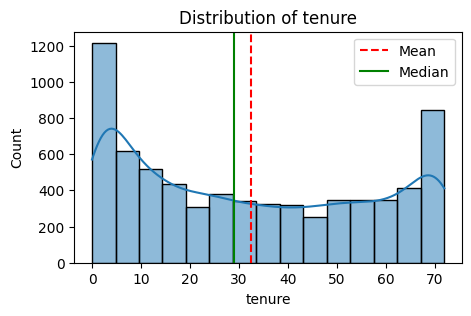

In [39]:
histogram(df,'tenure')

Mean: 64.85189431704886
Median: 70.4


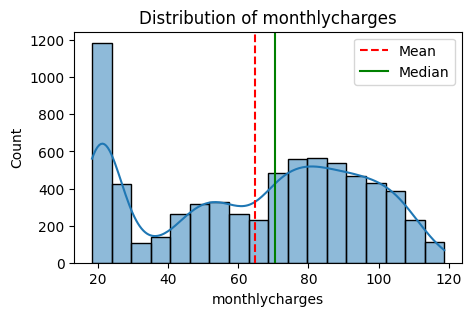

In [40]:
histogram(df,'monthlycharges')


Mean: 2286.765026349523
Median: 1400.55


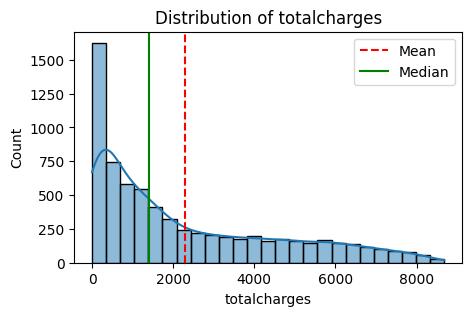

In [41]:
histogram(df,'totalcharges')

In [42]:
numerical=numerical[1:]
numerical

['tenure', 'monthlycharges', 'totalcharges']

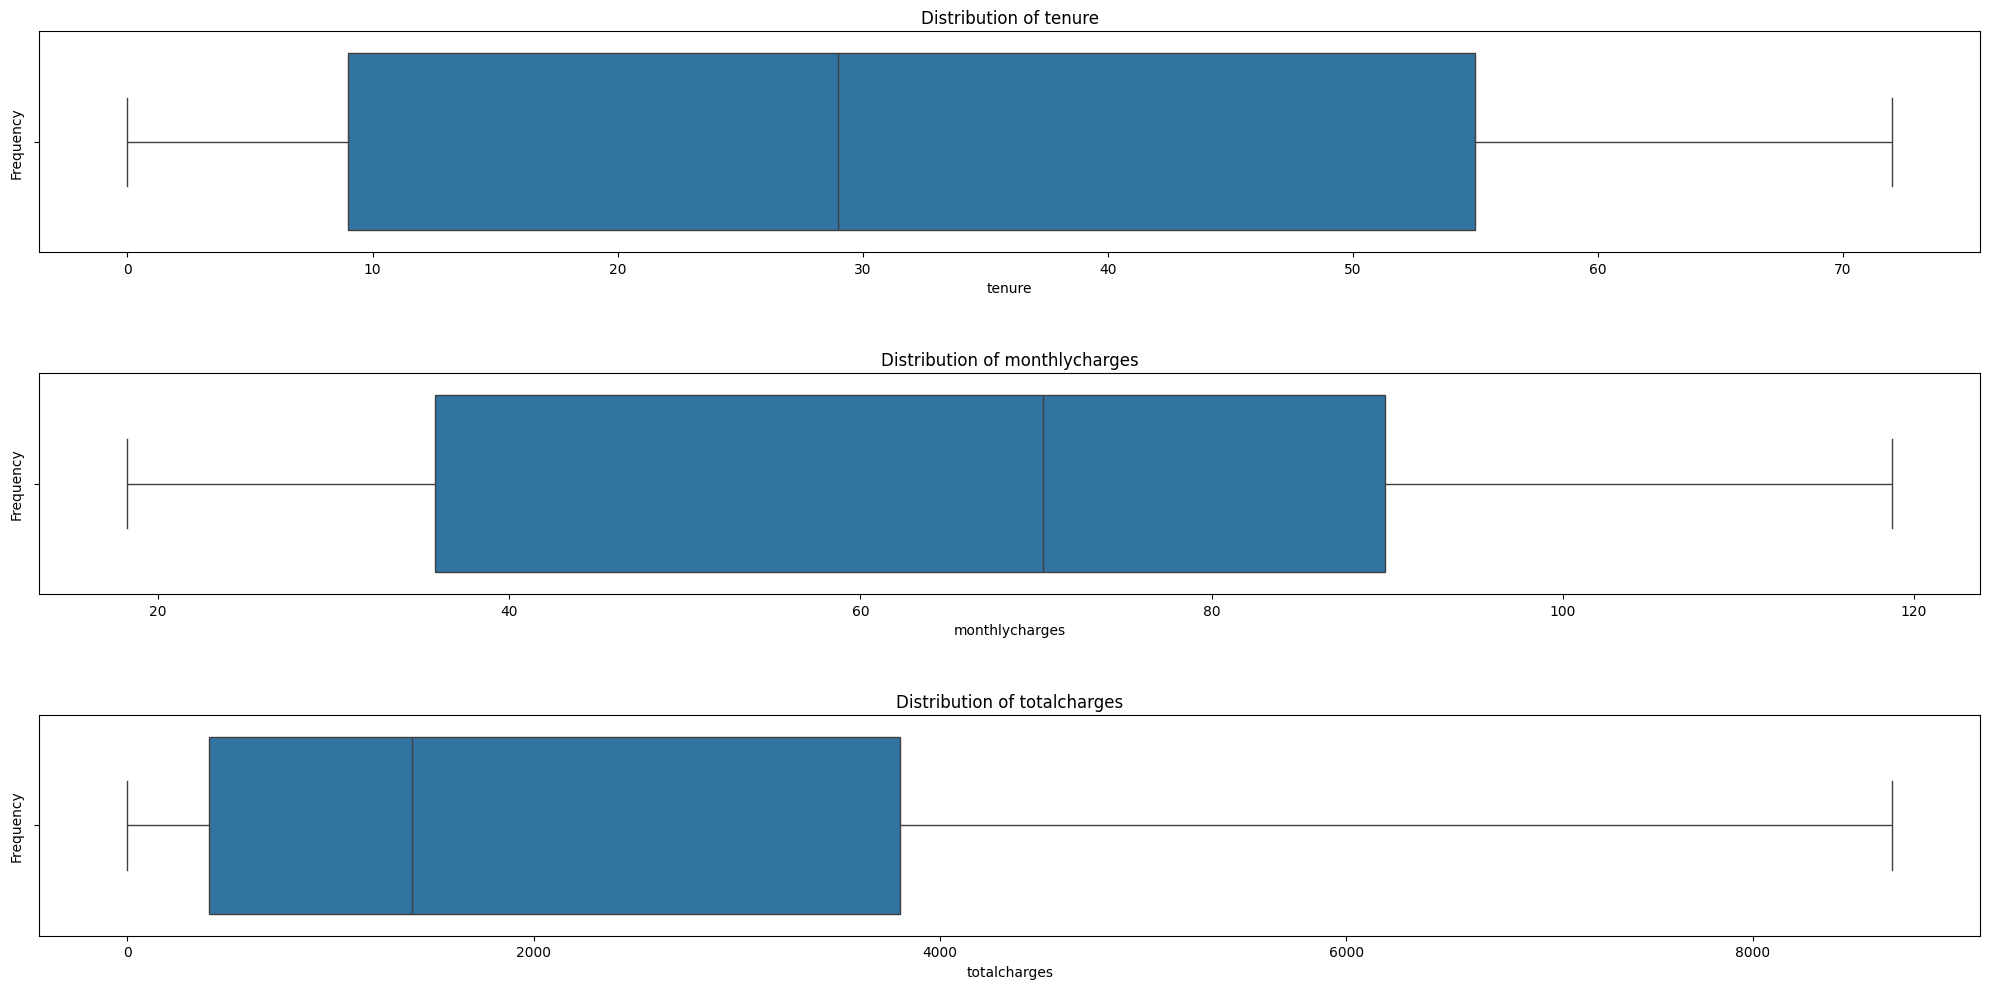

In [43]:
plt.figure(figsize=(20,10))
for i,col in enumerate(numerical):
    plt.subplot(3,1,i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')

plt.tight_layout(h_pad=4)
plt.show()


there is no outliers in data

In [44]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

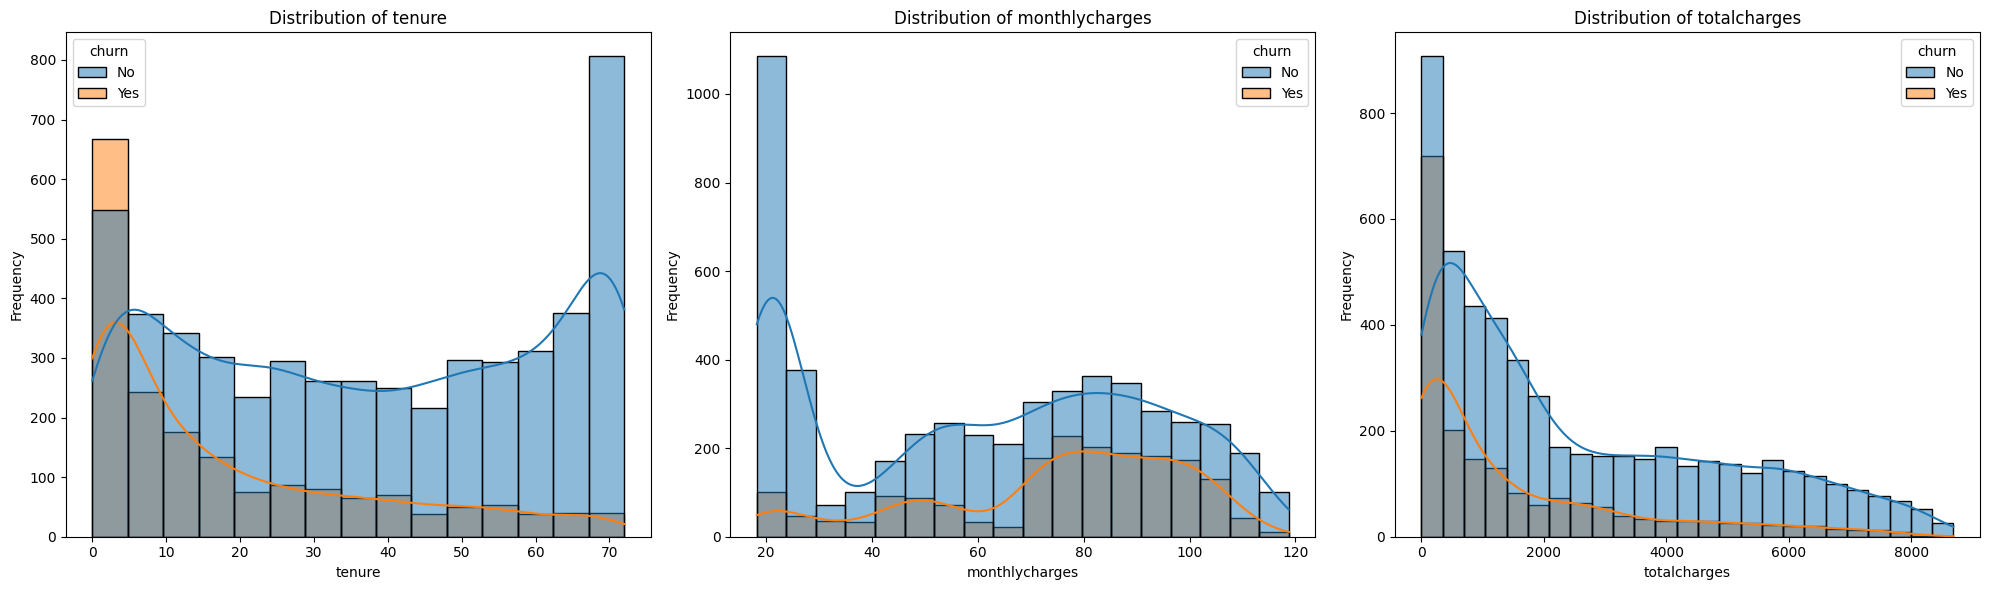

In [45]:
plt.figure(figsize=(20,6))
for i,col in enumerate(numerical):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df,x=df[col],kde=True,hue='churn')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

**Insights**

**Tenure**
Customers with lower tenure have a higher churn and
Customers with long tenure tend to not churn
-> Newer Customers are more likely to churn

**Monthlycharges**
Customers with a higher Monthlycharges have a higher churn rate and
Customers with a lower Monthlycharges are more likely to stay
-> Higher charges correlate with churn

**Totalcharges**
Customers with low total charges have a much higher churn rate and
Customers with higher total charges rarely churn
-> long-term customers (who have paid more over time) are less likely to leave


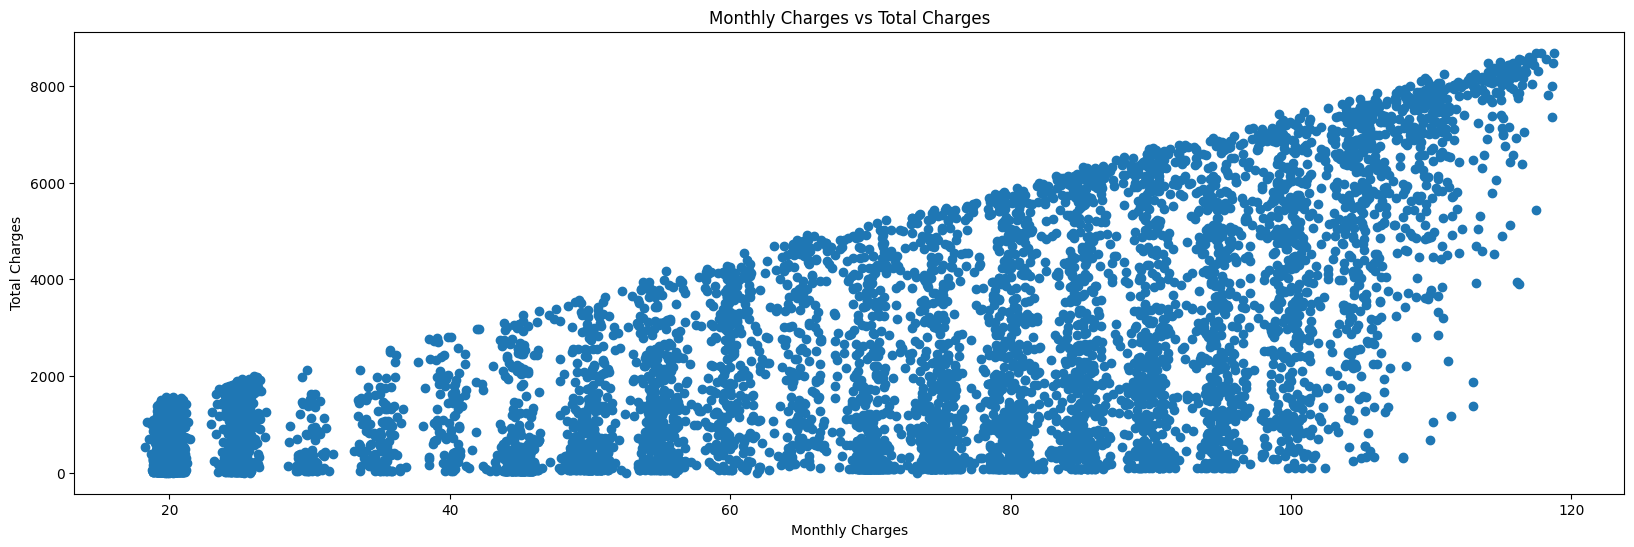

In [46]:
plt.figure(figsize=(20,6))
plt.scatter(df['monthlycharges'],df['totalcharges'])
plt.title('Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

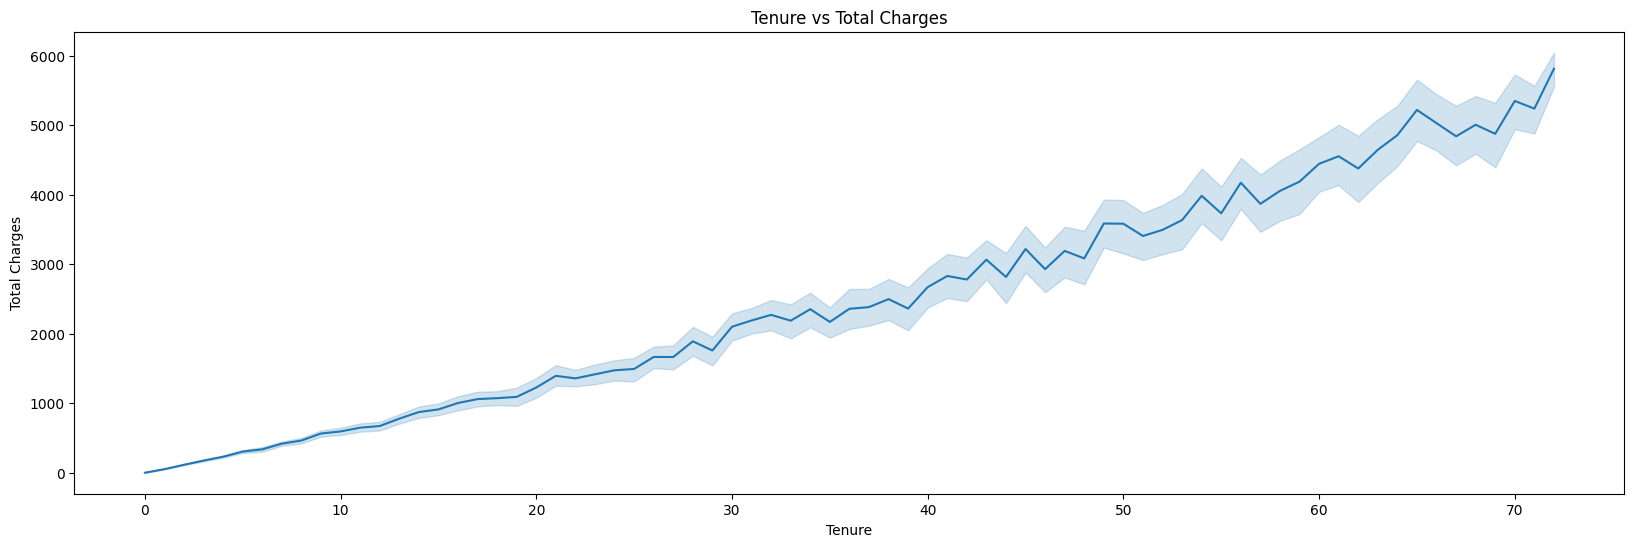

In [47]:
plt.figure(figsize=(20,6))
sns.lineplot(x=df['tenure'],y=df['totalcharges'])
plt.title('Tenure vs Total Charges')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.show()

This indicates that customers who stay longer tend to accumulate higher total charges

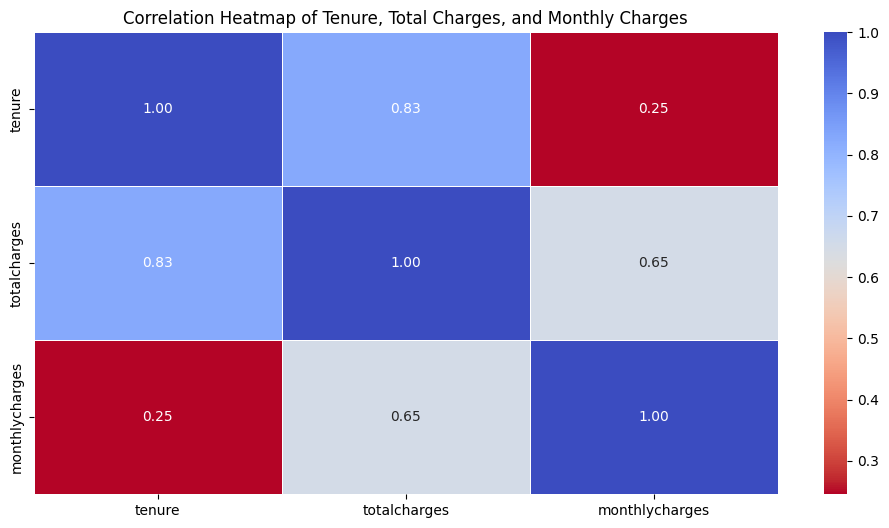

In [48]:
corr_features = df[['tenure', 'totalcharges', 'monthlycharges']]


corr_matrix = corr_features.corr()


plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", linewidths=0.5)


plt.title('Correlation Heatmap of Tenure, Total Charges, and Monthly Charges')


plt.show()

In [49]:
len(categorical)

16

In [50]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

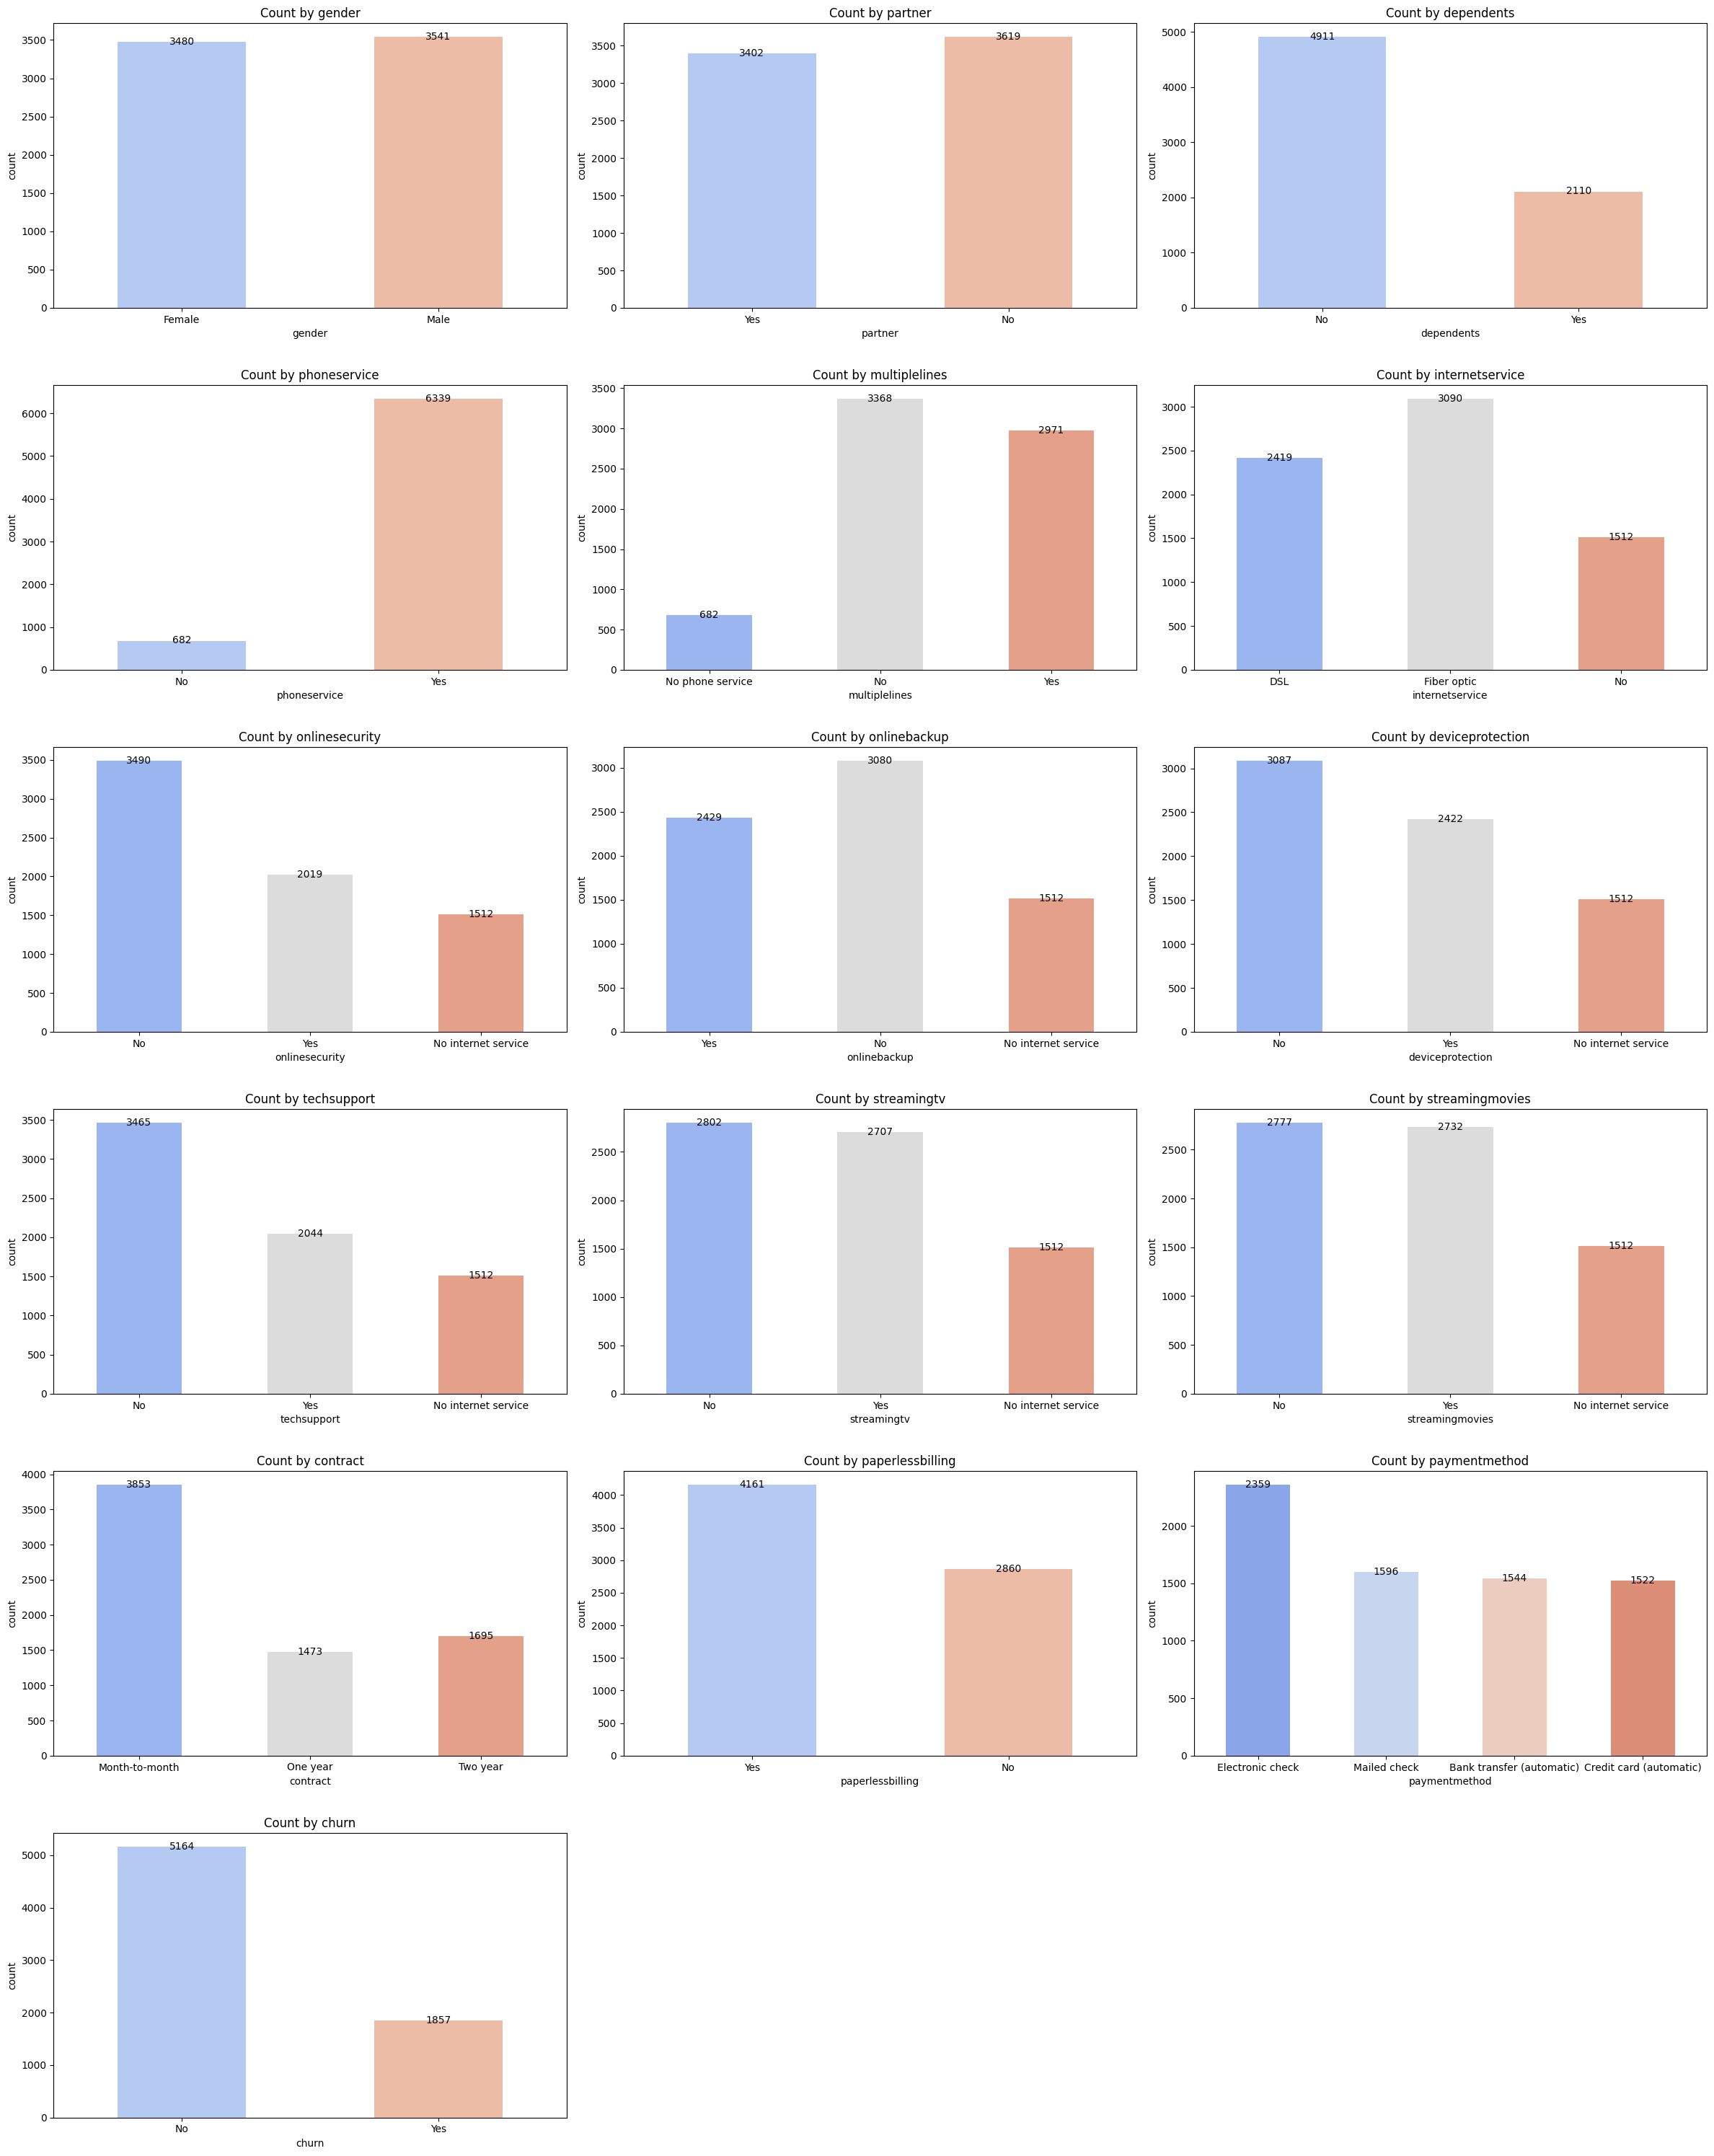

In [51]:
plt.figure(figsize=(24,30))
for i,col in enumerate(categorical,1):
    plt.subplot(6,3,i)

    sns.countplot(data = df ,x = col, palette='coolwarm',width=0.5,)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Count by {col}')
plt.tight_layout(h_pad=3)
plt.show()

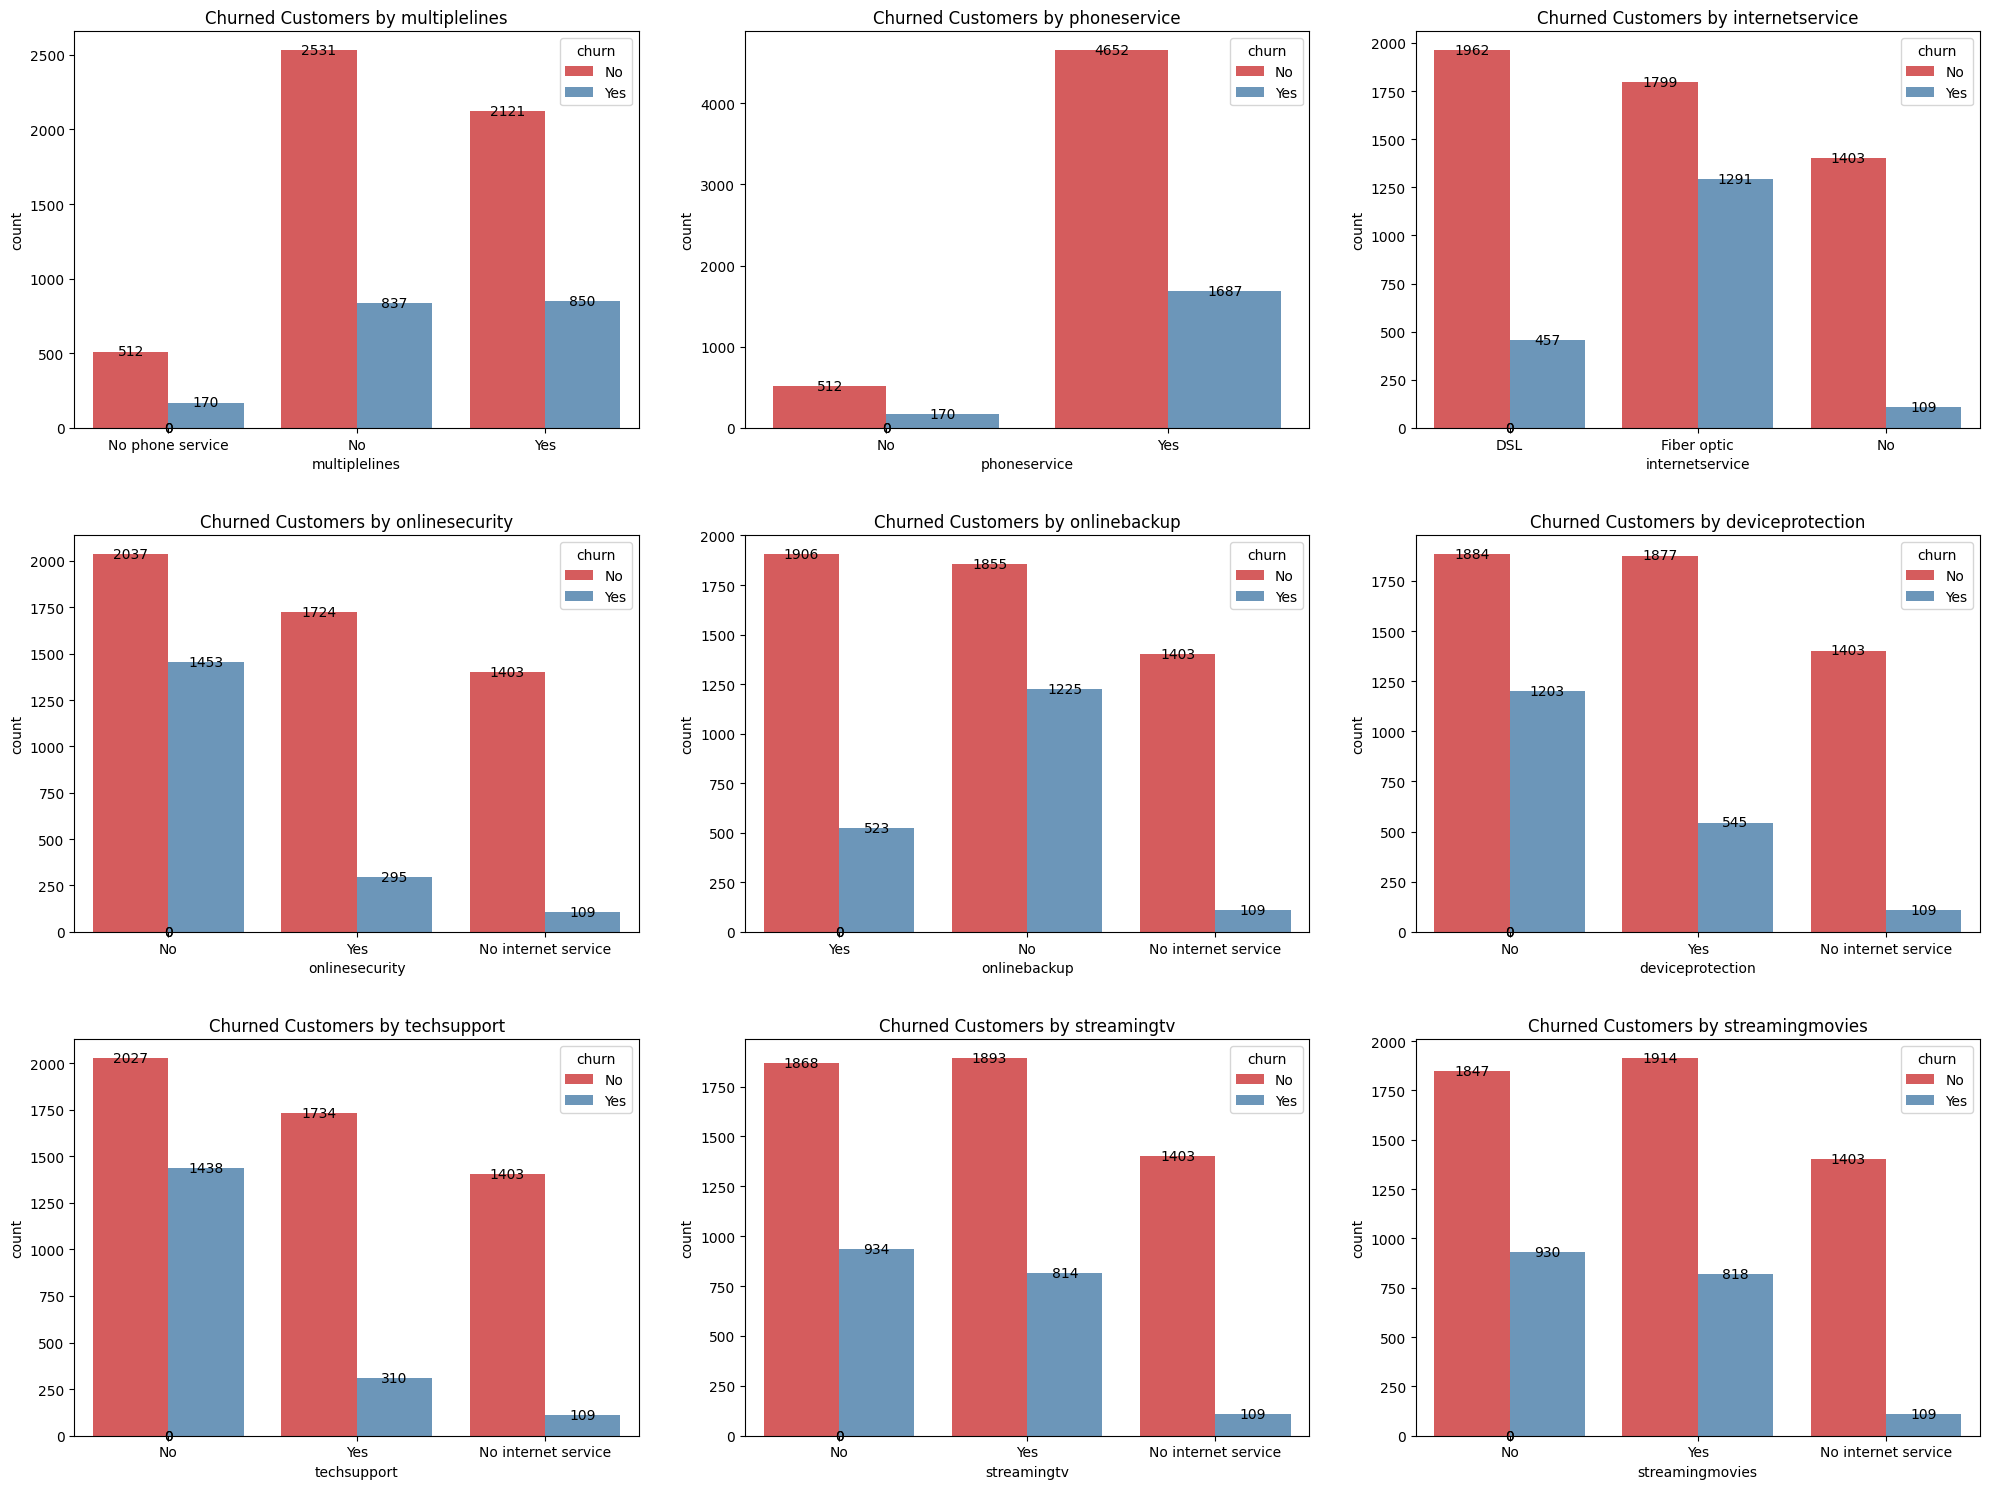

In [52]:
service=['multiplelines', 'phoneservice', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies']

plt.figure(figsize=(20,15))
for i,col in enumerate(service,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df ,x = col, hue = 'churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=3,w_pad=3)

In [53]:
df['seniorcitizen']=df['seniorcitizen'].astype('object')

In [54]:
bi_out=[]
for col in df.columns:
  if df[col].nunique()==2 and df[col].dtype=='O':
    bi_out.append(col)

In [55]:
bi_out

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'paperlessbilling',
 'churn']

In [56]:
bi_out.remove('phoneservice')

In [57]:
bi_out.remove('churn')

In [58]:
bi_out

['gender', 'seniorcitizen', 'partner', 'dependents', 'paperlessbilling']

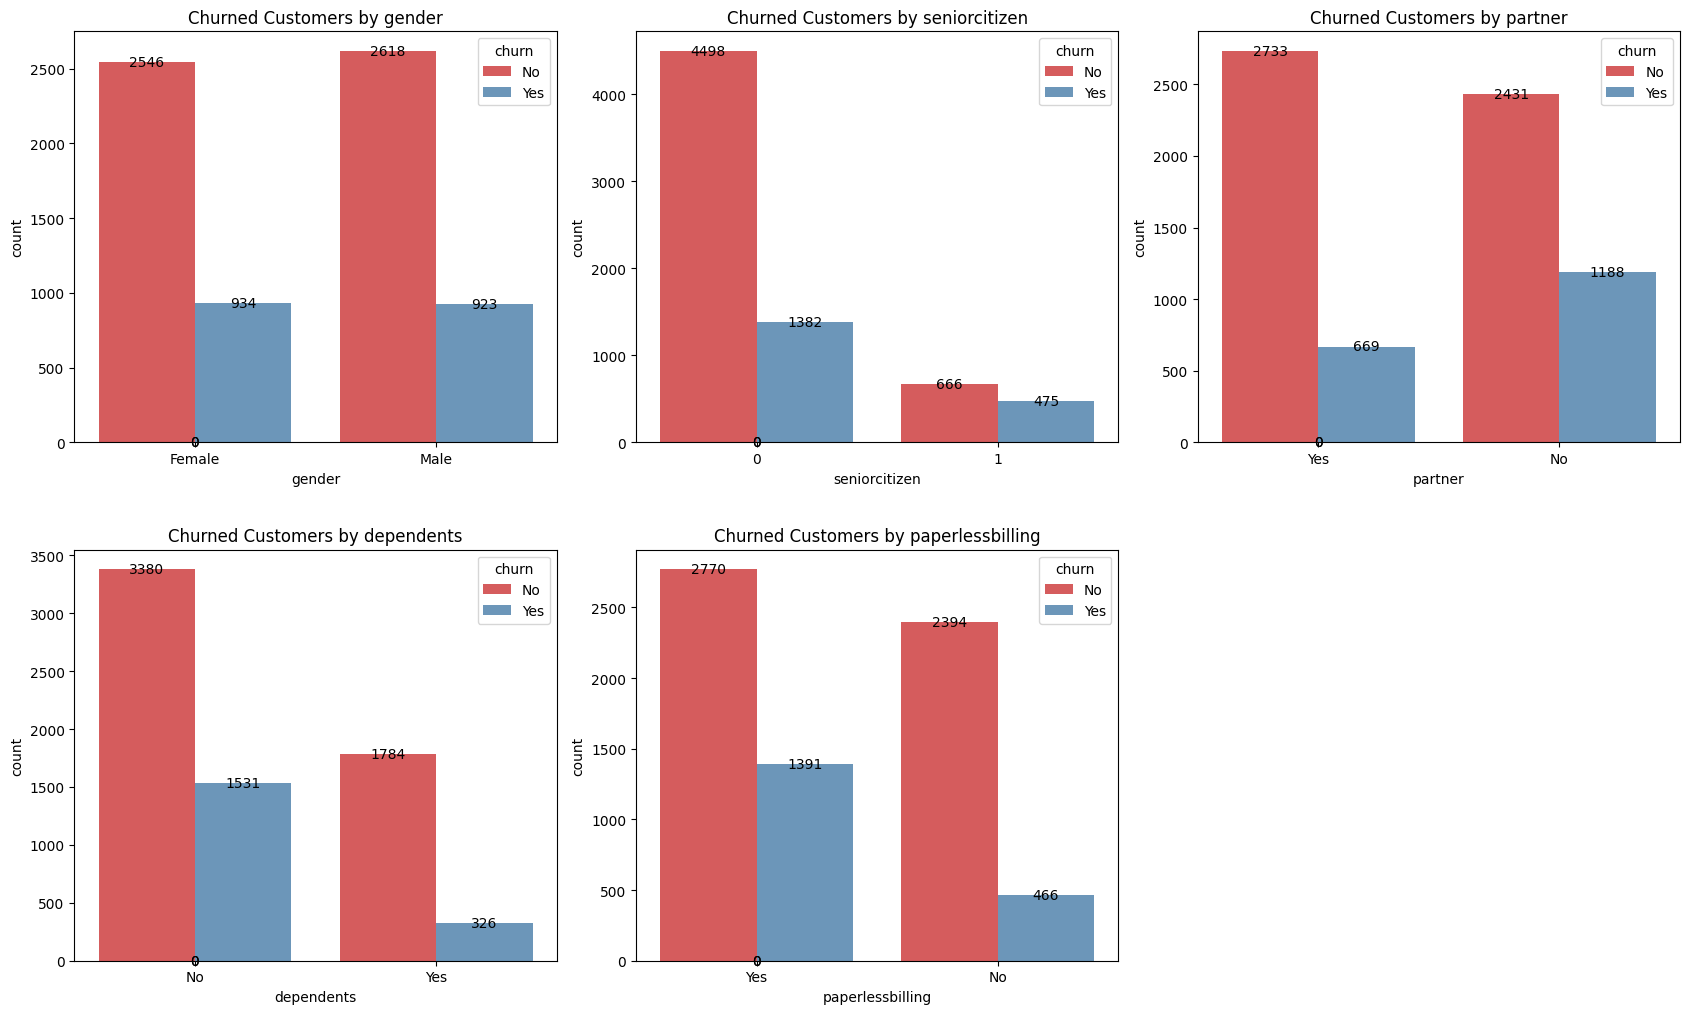

In [59]:
plt.figure(figsize=(17,15))
for i,col in enumerate(bi_out,1):
    plt.subplot(3,3,i)
    sns.countplot(data = df ,x = col, hue = 'churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=3)

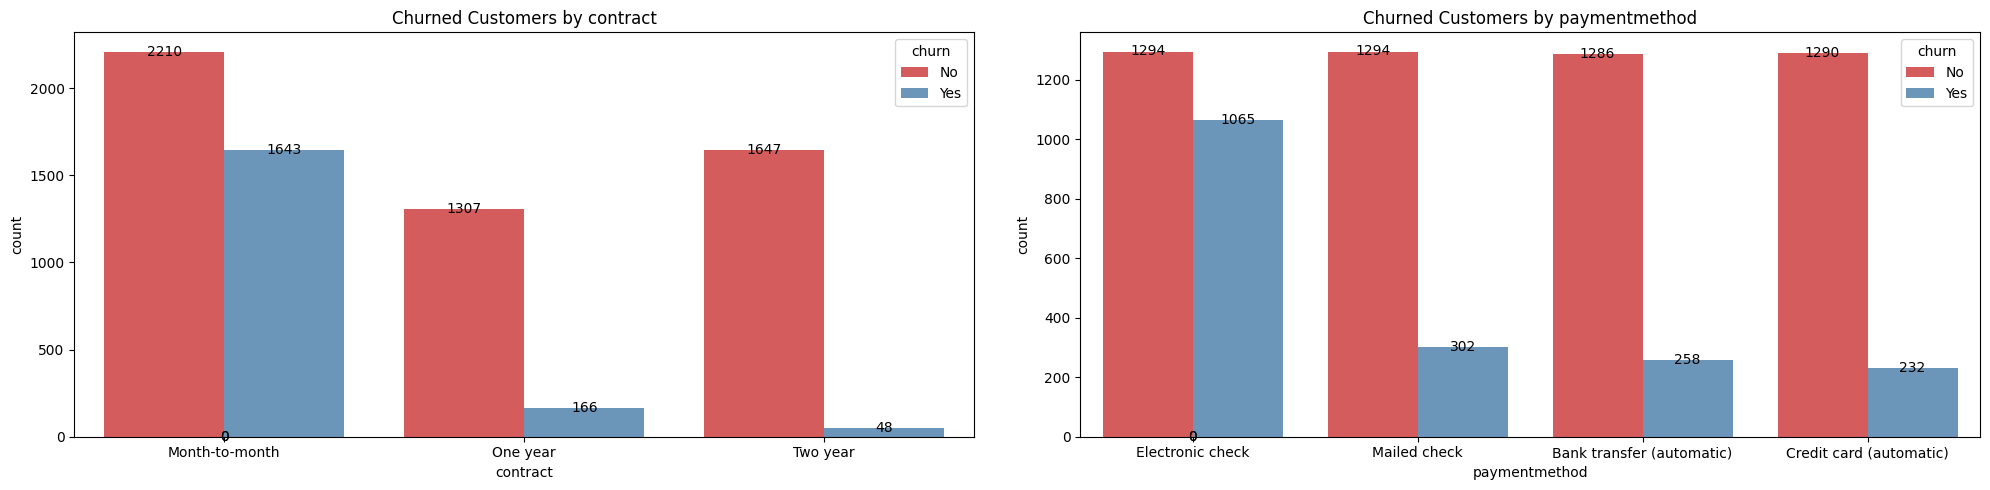

In [60]:
plt.figure(figsize=(20,5))
for i,col in enumerate(['contract','paymentmethod'],1):
    plt.subplot(1,2,i)
    sns.countplot(data = df ,x = col, hue = 'churn', palette='Set1',alpha=.8)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5, int(p.get_height()), ha='center', va='center')

    plt.title(f'Churned Customers by {col}')
plt.tight_layout(h_pad=5,w_pad=3)

In [61]:
df['tenure_years'] = df['tenure'] / 12

In [62]:
bins = [0, 1, 2, 3, 4, 5, df['tenure_years'].max()]
labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '>5 Years']
df['tenure_years_group'] = pd.cut(df['tenure_years'], bins=bins, labels=labels)

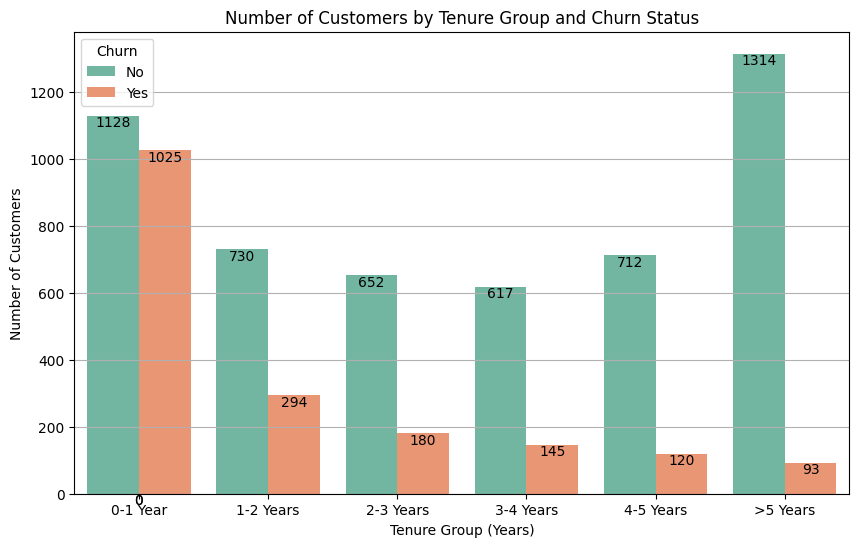

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x='tenure_years_group',
              hue='churn',
              palette='Set2',
              order=labels)
for p in plt.gca().patches:
  plt.text(p.get_x() + p.get_width() / 2, p.get_height()-20, int(p.get_height()), ha='center', va='center')

plt.title('Number of Customers by Tenure Group and Churn Status')
plt.xlabel('Tenure Group (Years)')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.legend(title='Churn')
plt.savefig('tenure_group.png')
plt.show()


In [64]:
print((df['tenure * monthlycharges']>df['totalcharges']).sum())

3214


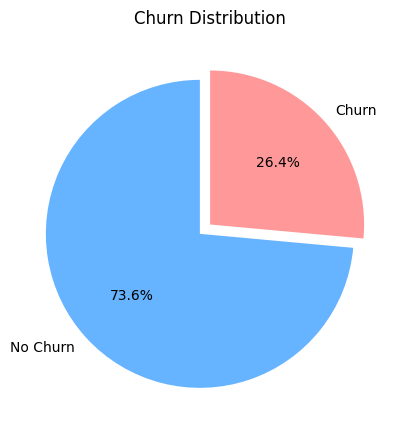

In [65]:

churn_counts = df['churn'].value_counts()

# Map labels for the chart only
labels = ['No Churn' if label == 'No' else 'Churn' for label in churn_counts.index]

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(churn_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=(0.09, 0))
plt.title('Churn Distribution')
# plt.savefig('churn_pie_chart.png', bbox_inches='tight', dpi=300)
plt.show()


## preprocessing

In [66]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'tenure * monthlycharges',
       'tenure_years', 'tenure_years_group'],
      dtype='object')

In [67]:
df=df.drop(columns=['tenure_years','tenure * monthlycharges','tenure_years_group'],axis=1)

In [68]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [69]:
df['seniorcitizen']=df['seniorcitizen'].astype('object')

In [70]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [71]:
def replace_yes_no(df, columns):

    for col in columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0})

columns_to_replace = [
    "partner", "dependents", "phoneservice",'multiplelines', "onlinesecurity", "onlinebackup",
    "deviceprotection", "techsupport", "streamingtv", "streamingmovies",
    "paperlessbilling", "churn"
]

replace_yes_no(df, columns_to_replace)

In [72]:
categories = [['Month-to-month','One year','Two year']]
oe = OrdinalEncoder(categories = categories)
df['contract'] = oe.fit_transform(df[['contract']])
# pkl.dump(oe,open('Contract_oe.pkl','wb'))
df['contract'].value_counts()

,count
contract,
0.0,3853
2.0,1695
1.0,1473


In [73]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols


Index(['gender', 'seniorcitizen', 'internetservice', 'paymentmethod'], dtype='object')

In [74]:
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])
   # pkl.dump(le,open(f'{col}_le.pkl','wb'))


In [75]:
df.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1.0,0,3,56.95,1889.50,0


In [76]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [77]:
df.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1.0,0,3,56.95,1889.50,0


## Feature Selection

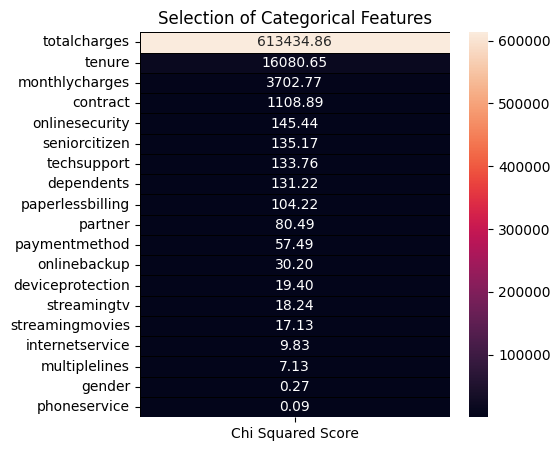

In [78]:
features = df.drop('churn',axis=1)
target = df['churn']

best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

In [79]:
X=df.drop(['churn','gender'],axis=1)
y=df['churn']

## Over-sampling

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy=0.9)
x_res, y_res = smote.fit_resample(X,y)

print(y_res.value_counts())
x_res.shape,  y_res.shape

churn
0    5164
1    4647
Name: count, dtype: int64


((9811, 18), (9811,))

## Splitting

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.15,random_state=42) # 85% train&val
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.20,random_state=42) # 65% train

## Modelling

In [82]:
Accuracy_models=[]
f1_score_models=[]
precision_scores=[]
recall_scores=[]
Models_names=[]

In [83]:
def evaluate_model_performance(model):
    y_train_pred=model.predict(x_train)
    y_val_pred=model.predict(x_val)
    y_test_pred=model.predict(x_test)

    Train_accuracy = accuracy_score(y_train,y_train_pred)
    Validaion_accuracy = accuracy_score(y_val,y_val_pred)

    Test_accuracy = accuracy_score(y_test,y_test_pred)
    test_recall_score=recall_score(y_test,y_test_pred)
    test_f1_score =f1_score(y_test,y_test_pred)
    precision_score_test=precision_score(y_test,y_test_pred)

    print(f"-Train accuracy: {Train_accuracy*100:.2f}%")
    print(f"-Validation accuracy: {Validaion_accuracy*100:.2f}%")
    print(f"-Test accuracy: {Test_accuracy*100:.2f}%\n")



    print(f'-Accuracy: {Test_accuracy*100:.2f}%')
    print(f'-F1_Score: {test_f1_score*100:.2f}%')
    print(f'-Precision: {precision_score_test*100:.2f}%')
    print(f'-Recall: { test_recall_score*100:.2f}%\n\n')

    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')


    if abs(Validaion_accuracy - Train_accuracy)*100 > 5:
        print(f"-Overfitting with diff: {abs(Validaion_accuracy - Train_accuracy)*100:.2f}%\n")
        print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    else:
        print(f"-Not Overfitting & Test accuracy: {Test_accuracy*100:.2f}%\n\n")



    Accuracy_models.append(Test_accuracy)
    f1_score_models.append(test_f1_score)
    precision_scores.append(precision_score_test)
    recall_scores.append(test_recall_score)


**Decision Tree**

In [84]:
decision_tree = DecisionTreeClassifier(random_state=42)
params={'criterion':['gini', 'entropy','log_loss'], 'max_depth':[5, 6, 7, 8,9, 10, 11, 12],'ccp_alpha':[0.001, 0.01, 0.02, 0.03]}

grid=GridSearchCV(estimator=decision_tree,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')

grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.03],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12]},
             scoring='accuracy')

In [85]:
finall_decision_tree=grid.best_estimator_
grid.best_params_

{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 7}

-Train accuracy: 82.36%
-Validation accuracy: 80.64%
-Test accuracy: 80.84%

-Accuracy: 80.84%
-F1_Score: 80.14%
-Precision: 78.70%
-Recall: 81.64%


-Not Overfitting & Test accuracy: 80.84%




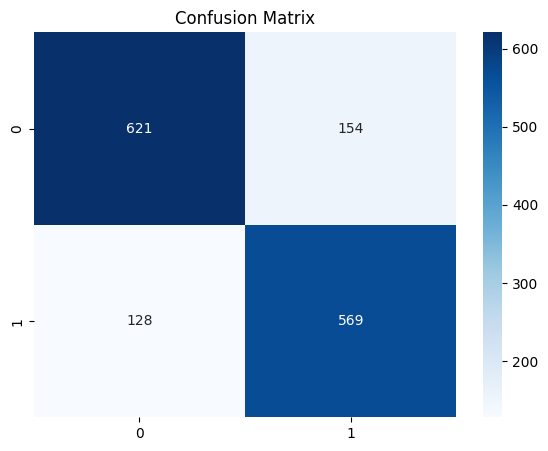

In [86]:
evaluate_model_performance(finall_decision_tree)

In [87]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

**Scaling**

In [88]:
sc=StandardScaler()
x_train[numerical]=sc.fit_transform(x_train[numerical])
x_val[numerical]=sc.transform(x_val[numerical])
x_test[numerical] =sc.transform(x_test[numerical])

In [89]:
# pkl.dump(sc,open('scaler.pkl','wb'))

**Logistic Regression**

In [90]:
lr= LogisticRegression()
params={'multi_class':['ovr','auto'],'C':[0.1,0.2,1,5,10],'penalty':['l1','l2']}
grid=GridSearchCV(estimator=lr,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 1, 5, 10],
                         'multi_class': ['ovr', 'auto'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [91]:
finall_lr=grid.best_estimator_
grid.best_params_

{'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l2'}

-Train accuracy: 81.22%
-Validation accuracy: 79.68%
-Test accuracy: 80.77%

-Accuracy: 80.77%
-F1_Score: 80.17%
-Precision: 78.36%
-Recall: 82.07%


-Not Overfitting & Test accuracy: 80.77%




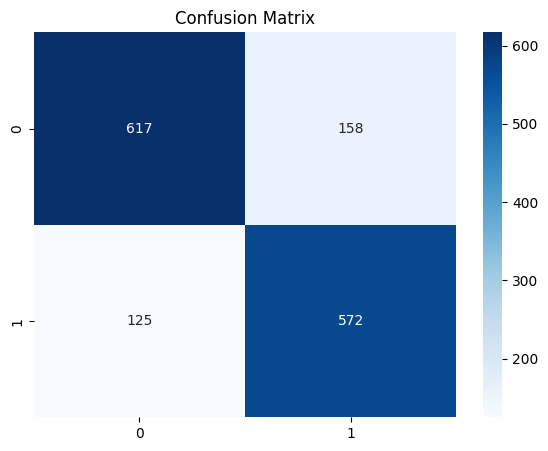

In [92]:
evaluate_model_performance(finall_lr)

**SVM**

In [93]:
svc=SVC(probability=True,random_state=42)
svc.fit(x_train,y_train)

SVC(probability=True, random_state=42)

-Train accuracy: 83.80%
-Validation accuracy: 81.29%
-Test accuracy: 81.73%

-Accuracy: 81.73%
-F1_Score: 80.46%
-Precision: 81.47%
-Recall: 79.48%


-Not Overfitting & Test accuracy: 81.73%




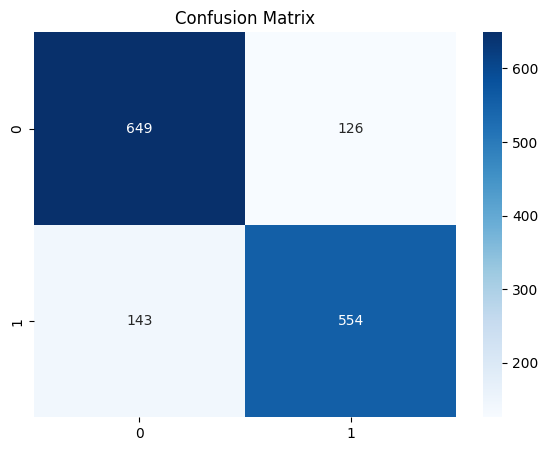

In [94]:
evaluate_model_performance(svc)

**Random Forest**

In [95]:
random_forest=RandomForestClassifier(random_state=42,ccp_alpha=0.001)
random_forest.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.001, random_state=42)

-Train accuracy: 83.63%
-Validation accuracy: 81.06%
-Test accuracy: 81.59%

-Accuracy: 81.59%
-F1_Score: 80.66%
-Precision: 80.26%
-Recall: 81.06%


-Not Overfitting & Test accuracy: 81.59%




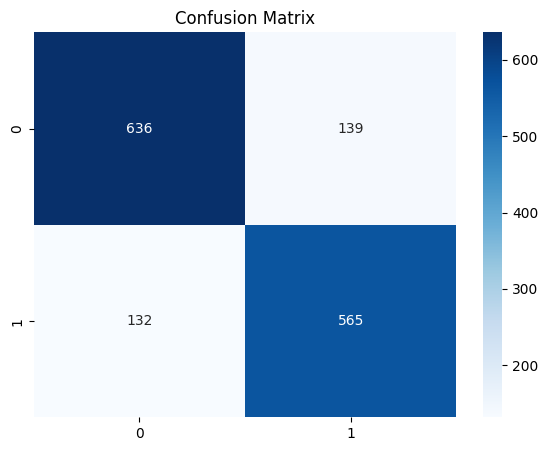

In [96]:
evaluate_model_performance(random_forest)

**KNN**

In [97]:
knn=KNeighborsClassifier(n_neighbors=12,p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

-Train accuracy: 83.24%
-Validation accuracy: 78.60%
-Test accuracy: 81.18%

-Accuracy: 81.18%
-F1_Score: 81.27%
-Precision: 76.85%
-Recall: 86.23%


-Not Overfitting & Test accuracy: 81.18%




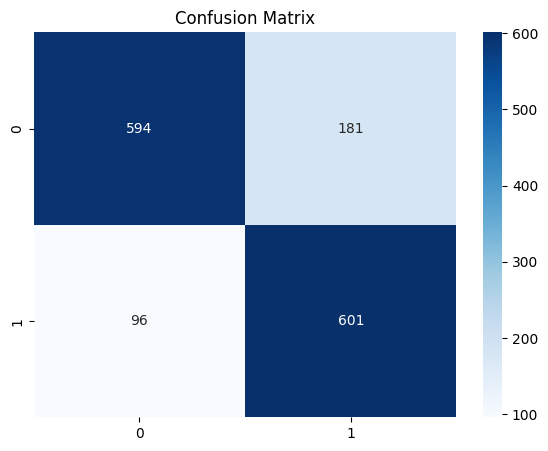

In [98]:
evaluate_model_performance(knn)

**GradientBoosting**

In [99]:
gradient_boosting=GradientBoostingClassifier(n_estimators=100,
                                            learning_rate=0.5,
                                            max_depth=2,
                                            random_state=42)
gradient_boosting.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, random_state=42)

-Train accuracy: 86.00%
-Validation accuracy: 82.49%
-Test accuracy: 83.15%

-Accuracy: 83.15%
-F1_Score: 82.34%
-Precision: 81.75%
-Recall: 82.93%


-Not Overfitting & Test accuracy: 83.15%




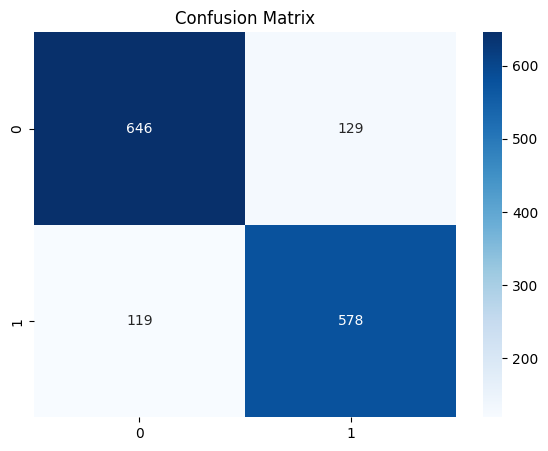

In [100]:
evaluate_model_performance(gradient_boosting)


**Stacking**

In [101]:
base_models = [('rf',RandomForestClassifier(max_depth= 4, n_estimators= 100)),
               ('xgb', XGBClassifier(n_estimators=90, max_depth=4, learning_rate=0.2, random_state=42))]

meta_model = LogisticRegression()
stacking = StackingClassifier(estimators=base_models,
                              final_estimator=meta_model
                              )
stacking.fit(x_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(max_depth=4)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=4,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=90, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

-Train accuracy: 87.51%
-Validation accuracy: 83.15%
-Test accuracy: 84.04%

-Accuracy: 84.04%
-F1_Score: 83.44%
-Precision: 81.99%
-Recall: 84.94%


-Not Overfitting & Test accuracy: 84.04%




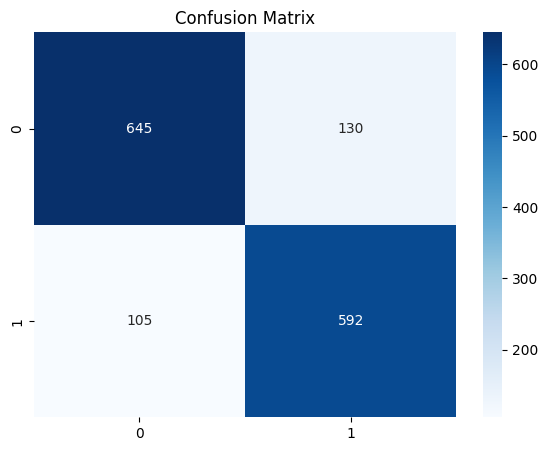

In [102]:
evaluate_model_performance(stacking)

In [103]:
Models_names=[]
for name in ['Decision Tree','LogisticRegression','SVC','RandomForest','KNN','GradientBoosting','Stacking']:
    Models_names.append(name)

In [104]:
print(Models_names)
print(Accuracy_models)
print(f1_score_models)
print(precision_scores)

['Decision Tree', 'LogisticRegression', 'SVC', 'RandomForest', 'KNN', 'GradientBoosting', 'Stacking']
[0.8084239130434783, 0.8077445652173914, 0.8172554347826086, 0.8158967391304348, 0.8118206521739131, 0.8315217391304348, 0.8403532608695652]
[0.8014084507042254, 0.8016818500350386, 0.8046477850399419, 0.806566738044254, 0.8127112914131169, 0.8233618233618234, 0.8343904157857647]
[0.7869986168741355, 0.7835616438356164, 0.8147058823529412, 0.8025568181818182, 0.768542199488491, 0.8175388967468176, 0.8199445983379502]


## Accuracy Compare

In [105]:
model_accuracy=pd.DataFrame({ 'Model':Models_names,'Accuracy':Accuracy_models,'Precision':precision_scores,'F1_Score':f1_score_models,'Recall':recall_scores }).sort_values(by='Accuracy',ascending=False)
model_accuracy.reset_index(inplace=True,drop=True)
model_accuracy

,Model,Accuracy,Precision,F1_Score,Recall
0,Stacking,0.840353,0.819945,0.834390,0.849354
1,GradientBoosting,0.831522,0.817539,0.823362,0.829268
2,SVC,0.817255,0.814706,0.804648,0.794835
3,RandomForest,0.815897,0.802557,0.806567,0.810617
4,KNN,0.811821,0.768542,0.812711,0.862267
5,Decision Tree,0.808424,0.786999,0.801408,0.816356
6,LogisticRegression,0.807745,0.783562,0.801682,0.820660


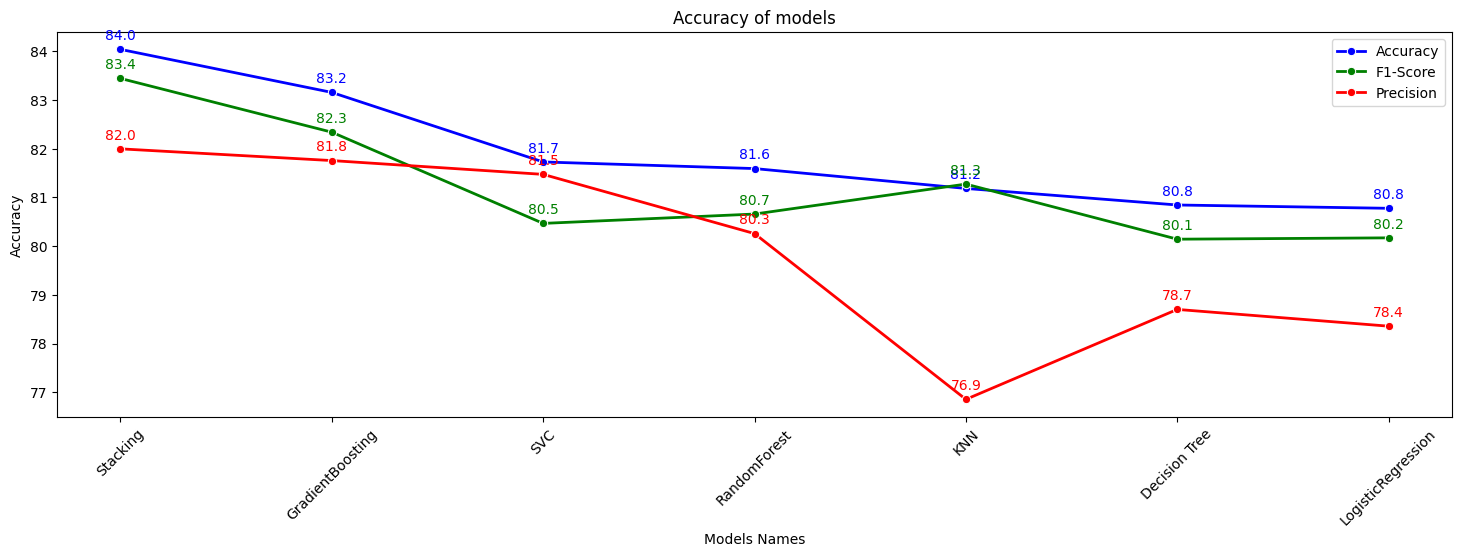

In [106]:
plt.figure(figsize=(18,5))

sns.lineplot(x=model_accuracy['Model'], y=model_accuracy['Accuracy']*100, marker='o', color='b', lw=2, label='Accuracy')
for i, score in enumerate(model_accuracy['Accuracy']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='b')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['F1_Score']*100,marker='o',color='g',lw=2,label='F1-Score')
for i, score in enumerate(model_accuracy['F1_Score']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='g')

sns.lineplot(x=model_accuracy['Model'],y=model_accuracy['Precision']*100,marker='o',color='r',lw=2,label='Precision')
for i, score in enumerate(model_accuracy['Precision']):
    plt.text(i, score*100 + 0.2, f'{score*100:.1f}', ha='center', color='r')


plt.legend()
plt.xticks(rotation=45)

plt.xlabel('Models Names')
plt.ylabel('Accuracy')
plt.title('Accuracy of models')
plt.savefig('Accuracy.png')
plt.show()


## Best Model

In [107]:
best_accuracy= model_accuracy.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
best_precision=model_accuracy.sort_values(by='Precision',ascending=False).reset_index(drop=True)
best_f1_score=model_accuracy.sort_values(by='F1_Score',ascending=False).reset_index(drop=True)
best_recall=model_accuracy.sort_values(by='Recall',ascending=False).reset_index(drop=True)


print(f'Best Accuracy Model: {best_accuracy.Model[0]} With accuracy: {best_accuracy.Accuracy[0]*100:0.2f}%')
print(f'Best F1_Score Model: {best_f1_score.Model[0]} With F1_Score: {best_f1_score.F1_Score[0]*100:0.2f}%')
print(f'Best Precision Model: {best_precision.Model[0]} With Precision: {best_precision.Precision[0]*100:0.2f}%')
print(f'Best Recall Model: {best_precision.Model[0]} With Recall: {best_recall.Recall[0]*100:0.2f}%')

Best Accuracy Model: Stacking With accuracy: 84.04%
Best F1_Score Model: Stacking With F1_Score: 83.44%
Best Precision Model: Stacking With Precision: 81.99%
Best Recall Model: Stacking With Recall: 86.23%


## Deployment

In [108]:
# models=[finall_decision_tree,finall_lr,random_forest,knn,svc,gradient_boosting,stacking]
# for model,name in zip(models,Models_names):
#   pkl.dump(model,open(f'{name}.pkl','wb'))

In [109]:
# pkl.dump(finall_lr,open('lr.pkl','wb'))